time series forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r'AirlinePassengers_data (1).csv')
df.head()



,ID,Datetime,Count
0,0,25-08-12 0:00,8
1,1,25-08-12 1:00,2
2,2,25-08-12 2:00,6
3,3,25-08-12 3:00,2
4,4,25-08-12 4:00,2


In [2]:
df.Timestamp=pd.to_datetime(df.Datetime,format="%d-%m-%y %H:%M") ###changing the values to the nodecimal form
df.index=df.Timestamp ###heading
df=df.resample("D").sum()##total no of booking done in each day(resampling at thday level

#Y for 4 ;ettet eg 2012...y for 2 letters eg 12

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [3]:
df.sort_index(axis=0)

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60
...,...,...
2013-12-27,281940,3868
2013-12-28,282516,3084
2013-12-29,283092,2330


In [5]:
X_train

NameError: name 'X_train' is not defined

In [6]:
#last two months for testing //nov n dec
#loc to access something on basis of index
train=df.loc[:'2013-10-31']
train.tail()

,ID,Count
Datetime,,
2013-10-27,246804,2082
2013-10-28,247380,3536
2013-10-29,247956,4030
2013-10-30,248532,3774
2013-10-31,249108,3408


In [7]:
test=df.loc["2013-11-01":]
test.tail()


,ID,Count
Datetime,,
2013-12-27,281940,3868
2013-12-28,282516,3084
2013-12-29,283092,2330
2013-12-30,283668,4928
2013-12-31,284244,4860


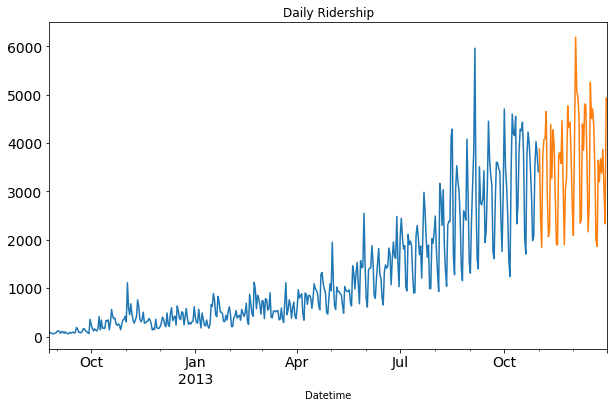

In [8]:
#plotting
train.Count.plot(figsize=(10,6),title='Daily Ridership',fontsize=14)
test.Count.plot(figsize=(10,6),title='Daily Ridership',fontsize=14)

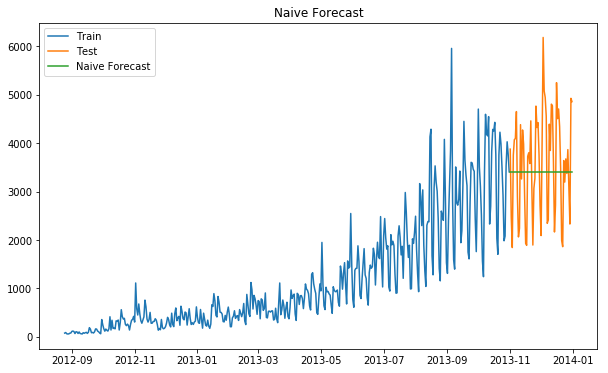

In [8]:
dd= np.asarray(train.Count)
y_hat = test.copy()
#print(dd)
y_hat['naive'] = dd[-1] #3408.0
#print(y_hat.head())
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()



In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat.Count,y_hat.naive))
print(rms)

1053.9937474540022


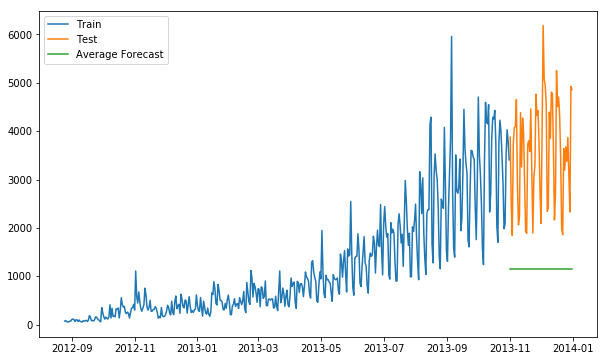

In [10]:
y_hat_avg=test.copy()
y_hat_avg['avg_forecast']=train['Count'].mean()##1160.00
#print(y_hat_avg.head())
plt.figure(figsize=(10,6))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.avg_forecast))
print(rms)

2637.2463664998872


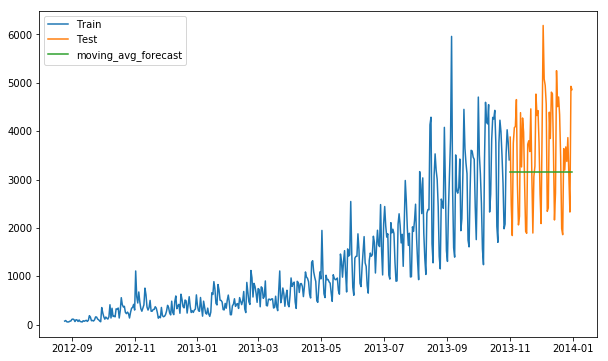

In [12]:
y_hat_avg=test.copy()
y_hat_avg['moving_avg_forecast']=train['Count'].rolling(60).mean().iloc[-1]##3162
plt.figure(figsize=(10,6))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='moving_avg_forecast')
plt.legend(loc='best')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.moving_avg_forecast))
print(rms)

1121.4817740256713


In [14]:
#exponential smoothingts
from statsmodels.tsa.api import SimpleExpSmoothing


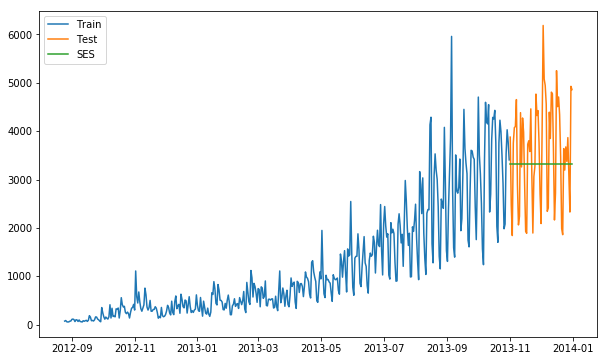

In [15]:
y_hat_avg=test.copy()
fit2=SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.1)
y_hat_avg['SES']=fit2.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.SES))
print(rms)

1071.2120259800895


In [17]:
fit2.aic

5436.843107680119

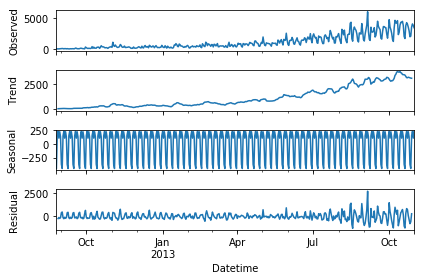

In [18]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
plt.show()

In [20]:
from statsmodels.tsa.api import Holt

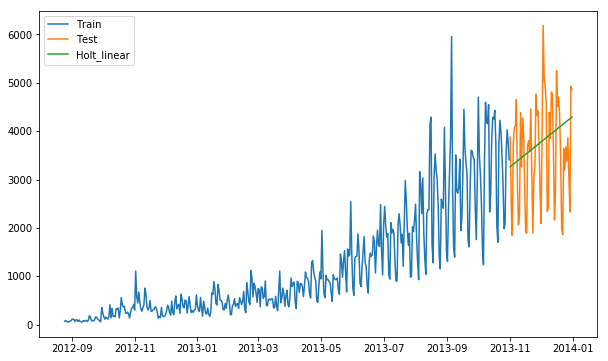

In [30]:
y_hat_avg=test.copy()
fit2=Holt(np.asarray(train['Count'])).fit(smoothing_level=0.24,smoothing_slope=0.2)
y_hat_avg['Holt_linear']=fit2.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.Holt_linear))
print(rms)

1058.023128499547


In [32]:
fit2.aic

5515.063161656322

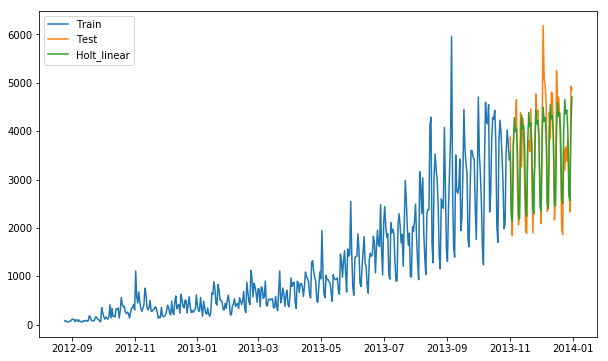

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg=test.copy()
fit1=ExponentialSmoothing(np.asarray(train['Count']),seasonal_periods=7,
                          trend='add',
                         seasonal='add').fit()
#season---7days....additive/multiplicative --mul-for exponential increasing data //add-gradually increasing data
y_hat_avg['Holt_linear']=fit1.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.Holt_linear))
print(rms)

575.0758215878236


In [ ]:
##rms is dropped drastically.this good model as we got less rmse.n 
we went simple avg tech.not suiting data.blue graph is below.n predicted is up.older data is not imp.ignoring data is not useful.more imp to recent data smoothing
trend comp -holt parameter ...alpha n beta..which handle bothe seasonality n trend to predict
people dont go arima.arima is expensive
arima model -